In [51]:
# Install required libraries (run once)
!pip install pandas matplotlib seaborn

# Import libraries (ensure os is imported here)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os  # This line imports the os module for directory operations

In [52]:
# Define the directory path
directory = "D:\\A5\\luna\\CREMP_CSV_files"

# Get all files in the directory
all_files = os.listdir(directory)

# Filter for CSV files and create full paths
csv_files = [f for f in all_files if f.endswith('.csv')]
file_paths = {f.replace('.csv', ''): os.path.join(directory, f) for f in csv_files}

# Load all CSV files into dataframes with error handling
dataframes = {}
for key, path in file_paths.items():
    try:
        dataframes[key] = pd.read_csv(path)
        print(f"\nSuccessfully loaded: {key}")
    except Exception as e:
        print(f"Failed to load {key} from {path} - Error: {e}")

# Display column names and data types for each dataframe
for name, df in dataframes.items():
    print(f"\nColumn names and data types for {name}:")
    print(df.dtypes)


Successfully loaded: CREMP_OCTO_RawData_2023

Successfully loaded: CREMP_OCTO_Summaries_2023_Density

Successfully loaded: CREMP_OCTO_Summaries_2023_MeanHeight

Successfully loaded: CREMP_Pcover_2023_StonyCoralSpecies

Successfully loaded: CREMP_Pcover_2023_TaxaGroups

Successfully loaded: CREMP_SCOR_RawData_2023

Successfully loaded: CREMP_SCOR_Summaries_2023_ConditionCounts

Successfully loaded: CREMP_SCOR_Summaries_2023_Counts

Successfully loaded: CREMP_SCOR_Summaries_2023_Density

Successfully loaded: CREMP_SCOR_Summaries_2023_LTA

Successfully loaded: CREMP_Stations_2023

Successfully loaded: CREMP_Temperatures_2023

Column names and data types for CREMP_OCTO_RawData_2023:
Year           int64
Date          object
Subregion     object
Habitat       object
SiteID         int64
Site_name     object
StationID      int64
SPP_Code      object
sciName       object
Height_cm    float64
dtype: object

Column names and data types for CREMP_OCTO_Summaries_2023_Density:
Year               

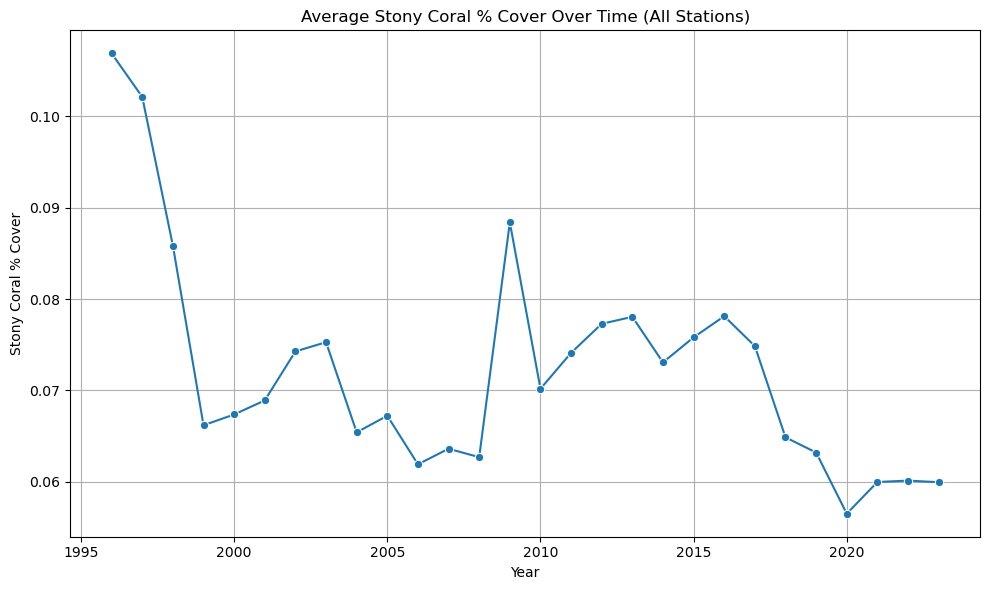

In [53]:
# Select relevant data
df_cover = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"]

# Group by year and calculate average total stony coral cover
df_cover["StonyCoralCover"] = df_cover.iloc[:, 10:].sum(axis=1)
cover_by_year = df_cover.groupby("Year")["StonyCoralCover"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=cover_by_year, x="Year", y="StonyCoralCover", marker="o")
plt.title("Average Stony Coral % Cover Over Time (All Stations)")
plt.xlabel("Year")
plt.ylabel("Stony Coral % Cover")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\1398252404.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


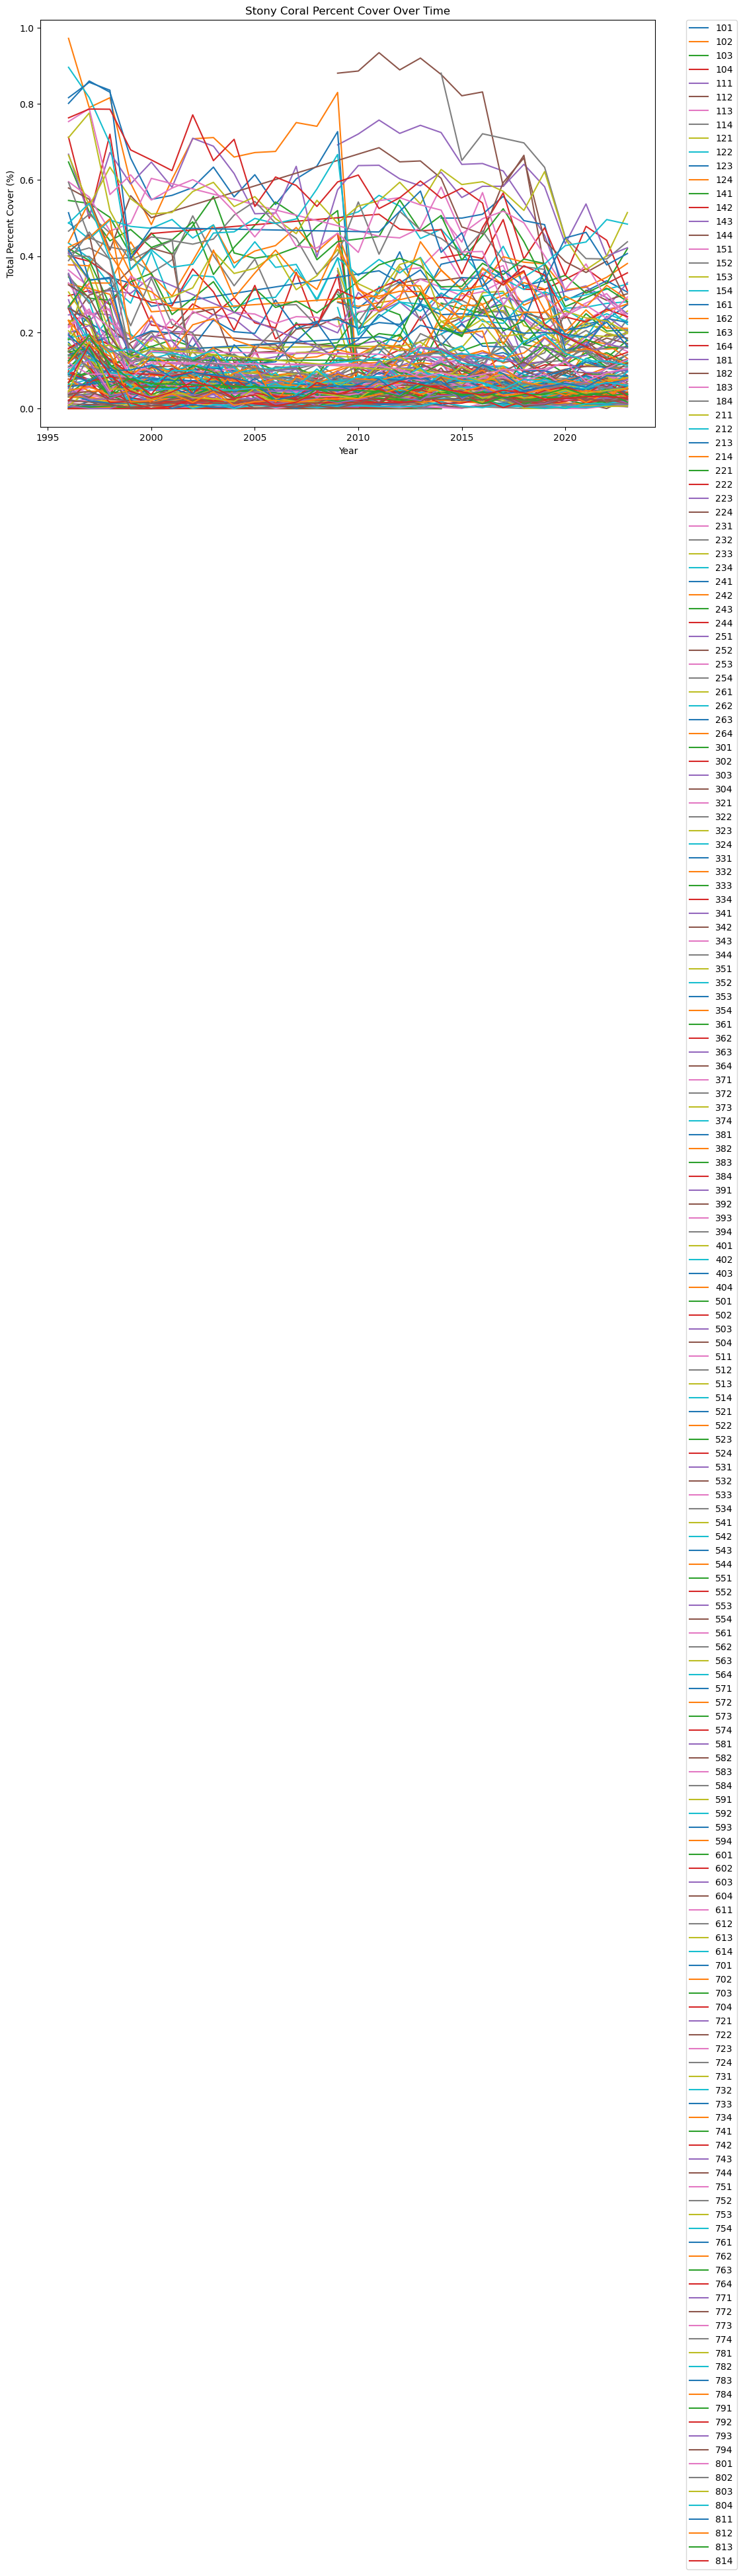

C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\1398252404.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


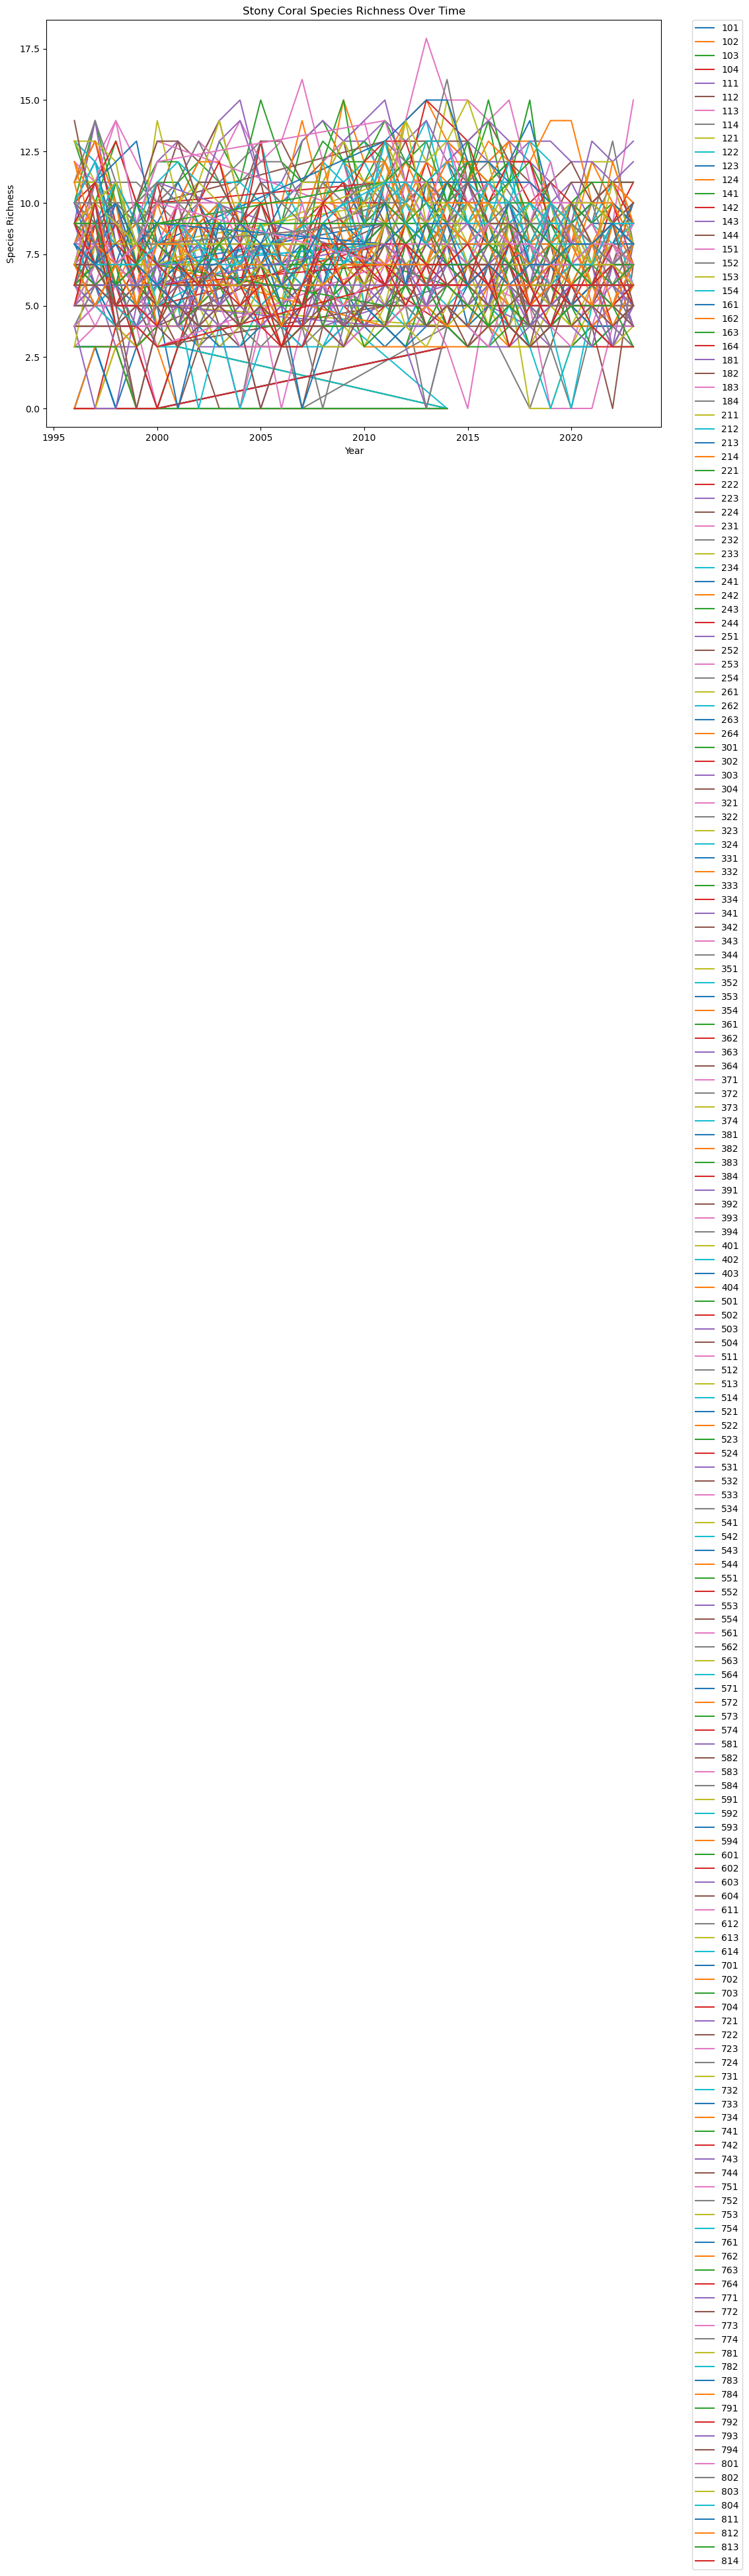

C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\1398252404.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


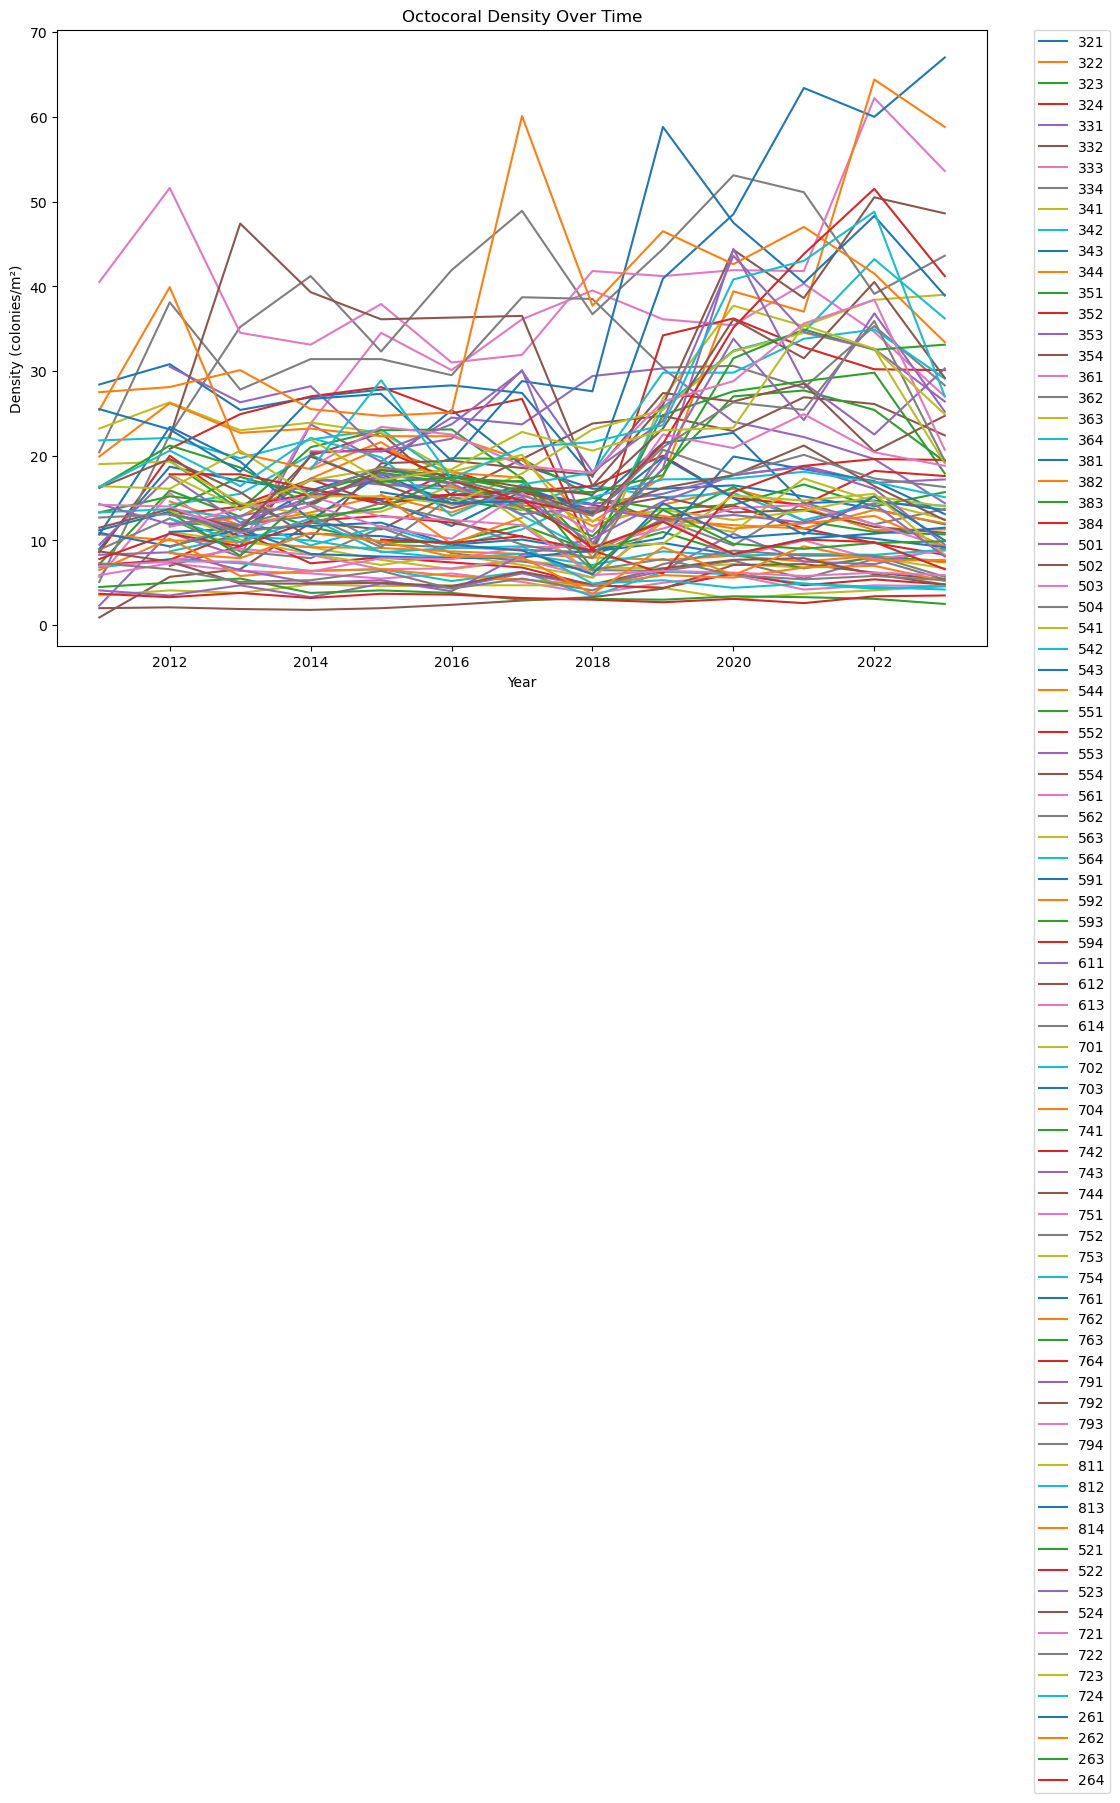

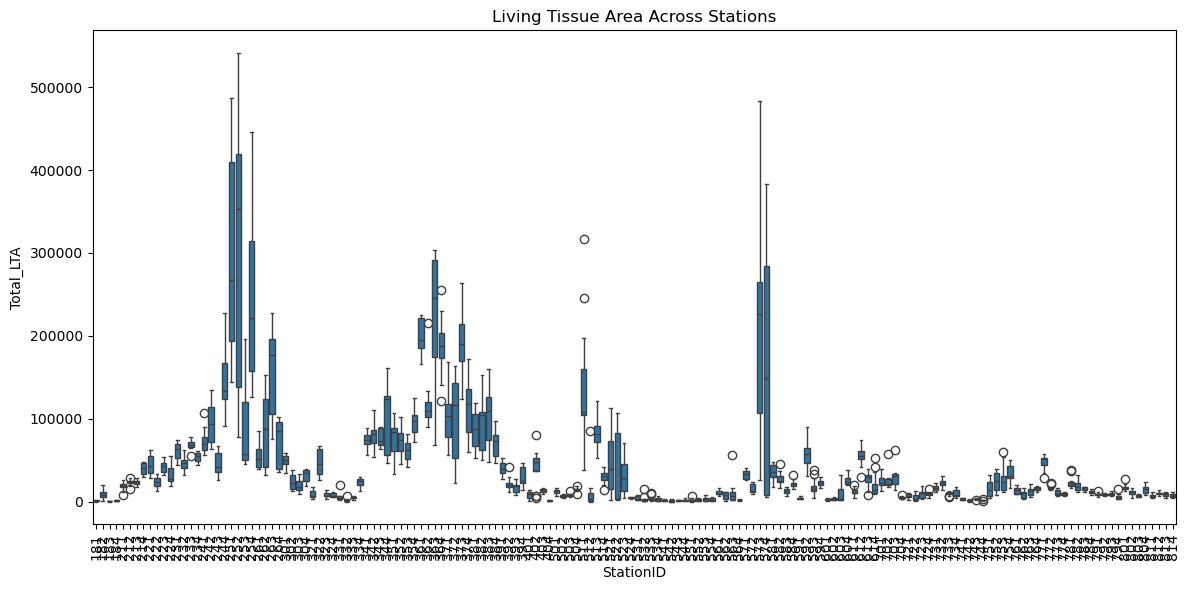

Spatial Patterns Sample:
Year       1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  ...  \
StationID                                                              ...   
101           1     1     1     1     1     0     0     0     0     0  ...   
102           1     1     1     1     1     1     0     0     0     0  ...   
103           1     1     1     1     1     1     0     0     0     0  ...   
104           1     1     1     1     1     0     0     0     0     0  ...   
111           1     1     1     1     1     0     0     0     0     0  ...   

Year       2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
StationID                                                              
101           1     0     0     0     0     0     0     0     0     0  
102           1     0     0     0     0     0     0     0     0     0  
103           1     0     0     0     0     0     0     0     0     0  
104           1     0     0     0     0     0     0     0     0     

In [54]:
# 1. Evolution of stony coral percent cover across stations
if 'CREMP_Pcover_2023_StonyCoralSpecies' in dataframes:
    # Sum all species columns for total percent cover
    species_cols = [col for col in dataframes['CREMP_Pcover_2023_StonyCoralSpecies'].columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
    dataframes['CREMP_Pcover_2023_StonyCoralSpecies']['Total_Percent_Cover'] = dataframes['CREMP_Pcover_2023_StonyCoralSpecies'][species_cols].sum(axis=1)
    
    cover_trends = dataframes['CREMP_Pcover_2023_StonyCoralSpecies'].groupby(['StationID', 'Year'])['Total_Percent_Cover'].mean().reset_index()
    plt.figure(figsize=(12, 8))  # Increased height to accommodate more legend entries
    for station in cover_trends['StationID'].unique():
        station_data = cover_trends[cover_trends['StationID'] == station]
        plt.plot(station_data['Year'], station_data['Total_Percent_Cover'], label=station)
    plt.xlabel('Year')
    plt.ylabel('Total Percent Cover (%)')
    plt.title('Stony Coral Percent Cover Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()
    plt.show()
else:
    print("CREMP_Pcover_2023_StonyCoralSpecies not found.")

# 2. Trends in species richness
if 'CREMP_Pcover_2023_StonyCoralSpecies' in dataframes:
    # Count non-zero species per row
    species_cols = [col for col in dataframes['CREMP_Pcover_2023_StonyCoralSpecies'].columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
    dataframes['CREMP_Pcover_2023_StonyCoralSpecies']['Species_Richness'] = (dataframes['CREMP_Pcover_2023_StonyCoralSpecies'][species_cols] > 0).sum(axis=1)
    
    richness = dataframes['CREMP_Pcover_2023_StonyCoralSpecies'].groupby(['StationID', 'Year'])['Species_Richness'].mean().reset_index()
    plt.figure(figsize=(12, 8))  # Increased height
    for station in richness['StationID'].unique():
        station_data = richness[richness['StationID'] == station]
        plt.plot(station_data['Year'], station_data['Species_Richness'], label=station)
    plt.xlabel('Year')
    plt.ylabel('Species Richness')
    plt.title('Stony Coral Species Richness Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()
    plt.show()
else:
    print("CREMP_Pcover_2023_StonyCoralSpecies not found.")

# 3. Octocoral density variation
if 'CREMP_OCTO_Summaries_2023_Density' in dataframes:
    plt.figure(figsize=(12, 8))  # Increased height
    for station in dataframes['CREMP_OCTO_Summaries_2023_Density']['StationID'].unique():
        station_data = dataframes['CREMP_OCTO_Summaries_2023_Density'][dataframes['CREMP_OCTO_Summaries_2023_Density']['StationID'] == station]
        plt.plot(station_data['Year'], station_data['Total_Octocorals'], label=station)
    plt.xlabel('Year')
    plt.ylabel('Density (colonies/m²)')
    plt.title('Octocoral Density Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Move legend outside
    plt.tight_layout()
    plt.show()
else:
    print("CREMP_OCTO_Summaries_2023_Density not found.")

# 4. Living tissue area differences
if 'CREMP_SCOR_Summaries_2023_LTA' in dataframes:
    # Sum LTA across species for total per station
    lta_cols = [col for col in dataframes['CREMP_SCOR_Summaries_2023_LTA'].columns if col not in ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']]
    dataframes['CREMP_SCOR_Summaries_2023_LTA']['Total_LTA'] = dataframes['CREMP_SCOR_Summaries_2023_LTA'][lta_cols].sum(axis=1)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='StationID', y='Total_LTA', data=dataframes['CREMP_SCOR_Summaries_2023_LTA'])
    plt.xticks(rotation=90)
    plt.title('Living Tissue Area Across Stations')
    plt.tight_layout()
    plt.show()
else:
    print("CREMP_SCOR_Summaries_2023_LTA not found.")

# 5. Spatial patterns
if 'CREMP_Pcover_2023_StonyCoralSpecies' in dataframes:
    spatial_patterns = dataframes['CREMP_Pcover_2023_StonyCoralSpecies'].groupby(['StationID', 'Year'])['Site_name'].count().unstack(fill_value=0)
    print("Spatial Patterns Sample:")
    print(spatial_patterns.head())
else:
    print("CREMP_Pcover_2023_StonyCoralSpecies not found.")

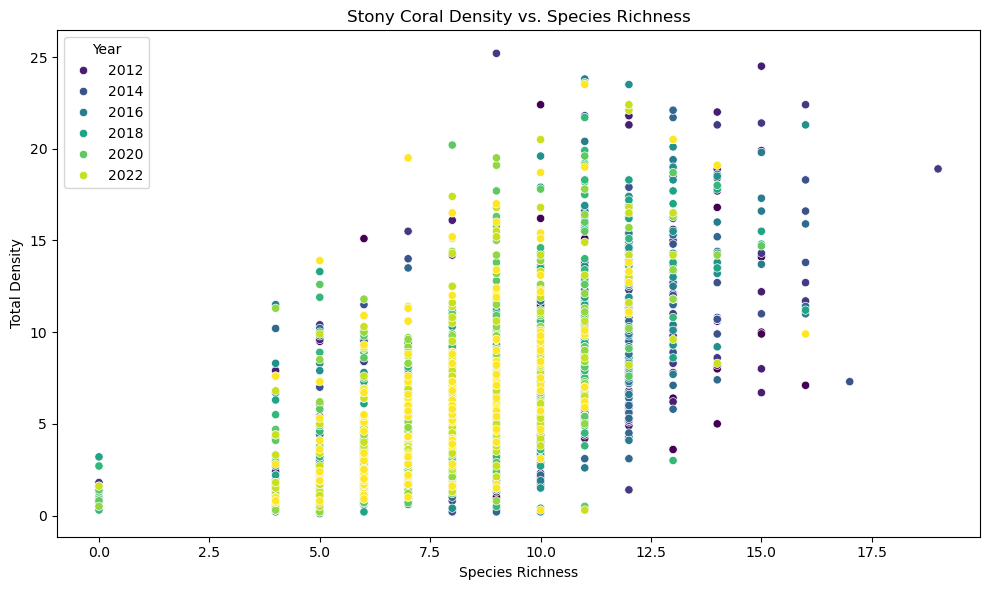

In [55]:
# Merge coral density and richness on StationID + Year
df_density = dataframes["CREMP_SCOR_Summaries_2023_Density"]
df_richness = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"].copy()

# Compute total density and richness
density_cols = [col for col in df_density.columns if col not in ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']]
df_density['Total_Density'] = df_density[density_cols].sum(axis=1)

species_cols = [col for col in df_richness.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
df_richness['Species_Richness'] = (df_richness[species_cols] > 0).sum(axis=1)

# Merge
merged_df = pd.merge(df_density[['StationID', 'Year', 'Total_Density']], 
                     df_richness[['StationID', 'Year', 'Species_Richness']], 
                     on=['StationID', 'Year'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Species_Richness', y='Total_Density', hue='Year', palette='viridis')
plt.title('Stony Coral Density vs. Species Richness')
plt.xlabel('Species Richness')
plt.ylabel('Total Density')
plt.tight_layout()
plt.show()


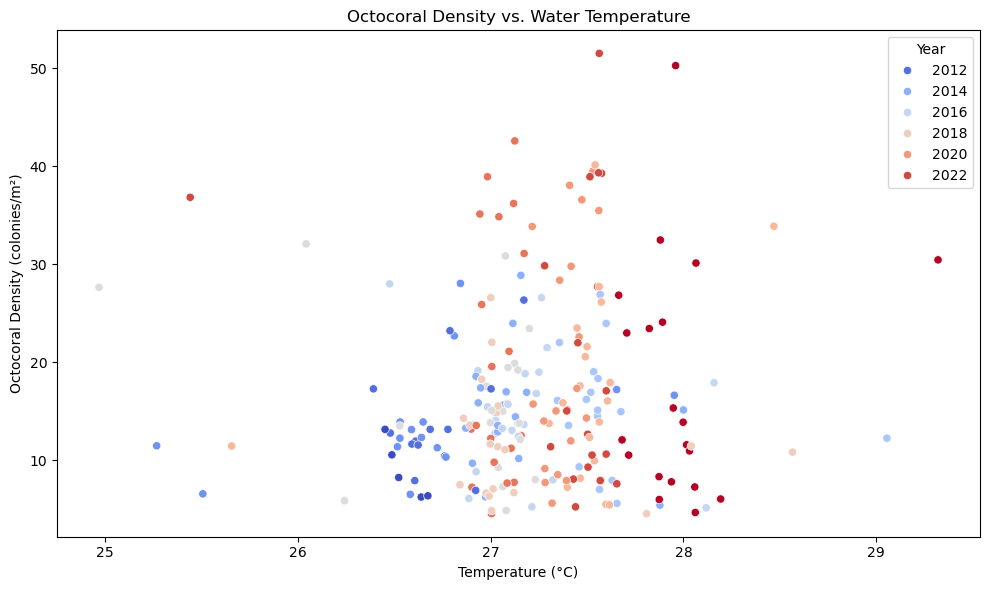

In [56]:
# Merge temperature + octocoral density
df_temp = dataframes["CREMP_Temperatures_2023"]
df_octo = dataframes["CREMP_OCTO_Summaries_2023_Density"].copy()

df_octo_grouped = df_octo.groupby(['SiteID', 'Year'])['Total_Octocorals'].mean().reset_index()
df_temp_grouped = df_temp.groupby(['SiteID', 'Year'])['TempC'].mean().reset_index()

merged_temp_octo = pd.merge(df_octo_grouped, df_temp_grouped, on=['SiteID', 'Year'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_temp_octo, x='TempC', y='Total_Octocorals', hue='Year', palette='coolwarm')
plt.title('Octocoral Density vs. Water Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Octocoral Density (colonies/m²)')
plt.tight_layout()
plt.show()


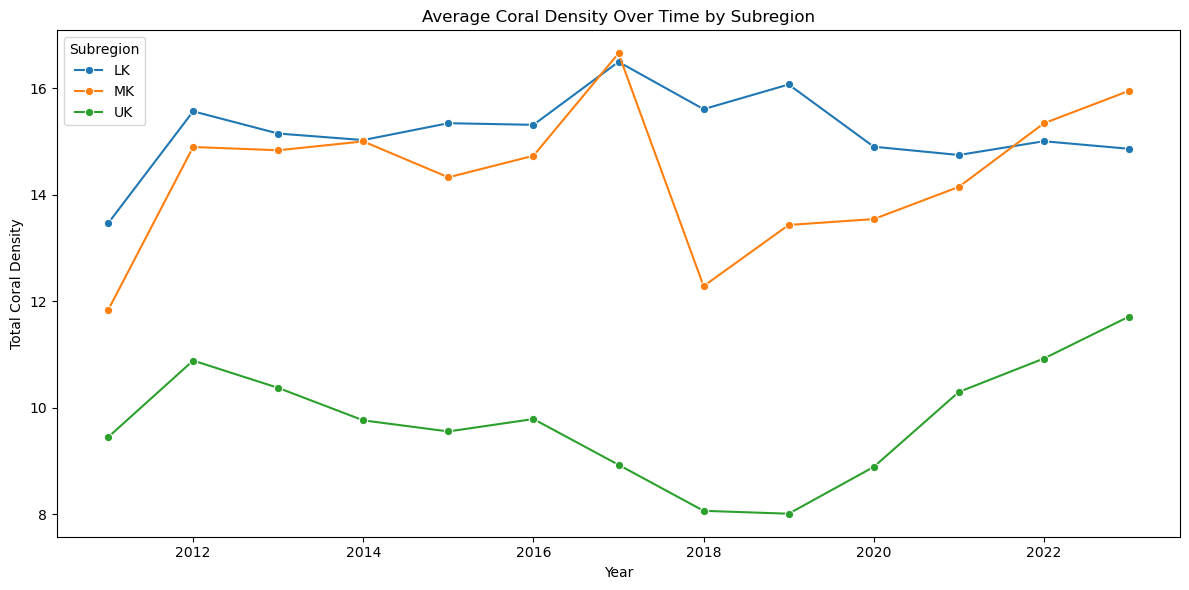

In [57]:
df_density = dataframes["CREMP_SCOR_Summaries_2023_Density"].copy()

# Compute total coral density
density_cols = [col for col in df_density.columns if col not in ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']]
df_density['Total_Density'] = df_density[density_cols].sum(axis=1)

# Group by Region (Subregion) and Year
region_density = df_density.groupby(['Subregion', 'Year'])['Total_Density'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_density, x='Year', y='Total_Density', hue='Subregion', marker='o')
plt.title('Average Coral Density Over Time by Subregion')
plt.xlabel('Year')
plt.ylabel('Total Coral Density')
plt.tight_layout()
plt.show()


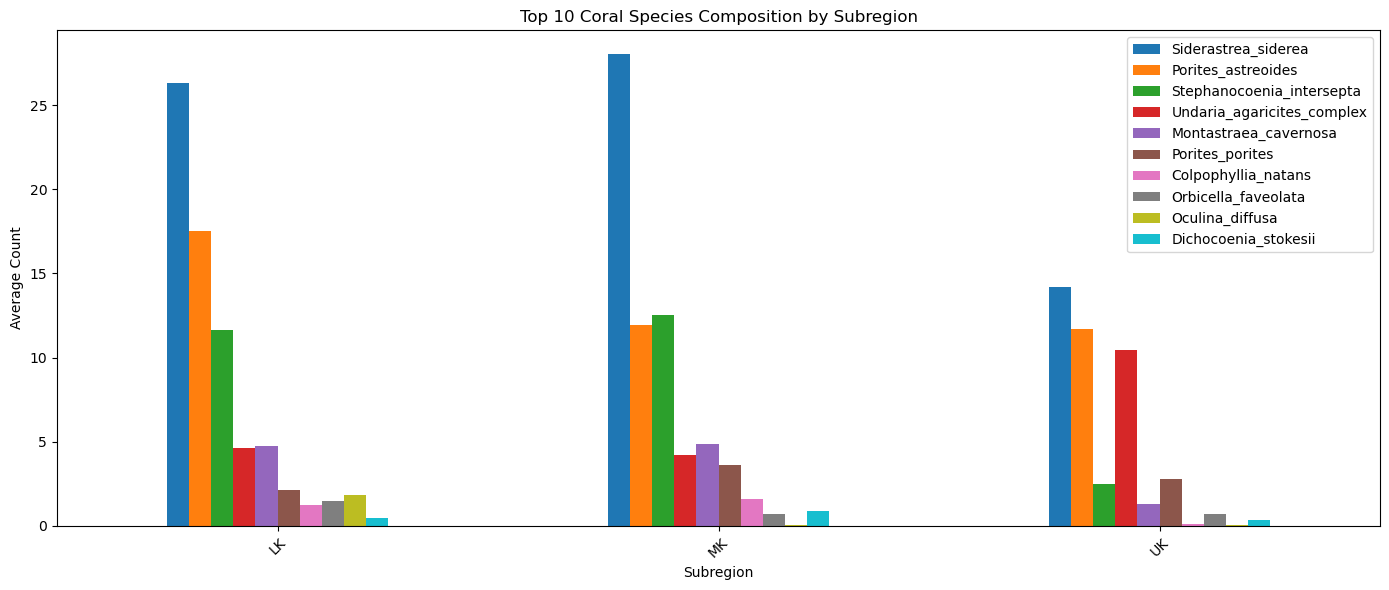

In [58]:
df_counts = dataframes["CREMP_SCOR_Summaries_2023_Counts"].copy()

# Filter out non-species columns
species_cols = [col for col in df_counts.columns if col not in ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID']]

# Calculate average species counts per subregion
region_composition = df_counts.groupby('Subregion')[species_cols].mean().T

# Take top 10 most abundant species (by overall mean across subregions)
top10_species = region_composition.mean(axis=1).sort_values(ascending=False).head(10).index
region_composition_top10 = region_composition.loc[top10_species].T

# Plot
region_composition_top10.plot(kind='bar', figsize=(14, 6))
plt.title('Top 10 Coral Species Composition by Subregion')
plt.ylabel('Average Count')
plt.xlabel('Subregion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


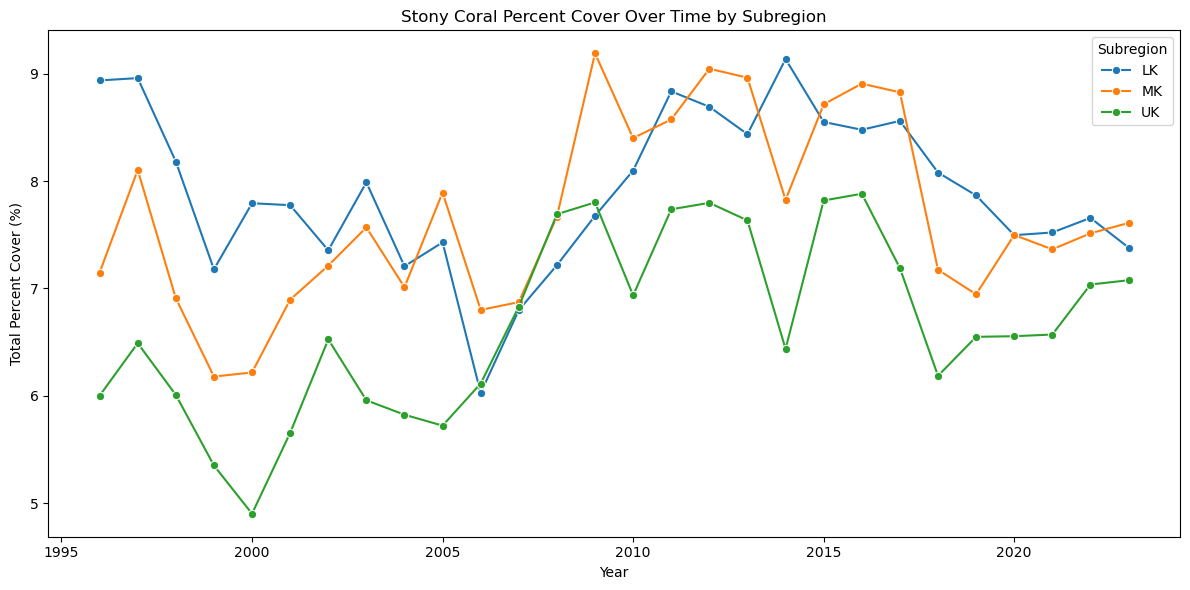

In [59]:
df_cover = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"].copy()
species_cols = [col for col in df_cover.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
df_cover["Total_Percent_Cover"] = df_cover[species_cols].sum(axis=1)

region_cover = df_cover.groupby(['Subregion', 'Year'])["Total_Percent_Cover"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_cover, x="Year", y="Total_Percent_Cover", hue="Subregion", marker='o')
plt.title("Stony Coral Percent Cover Over Time by Subregion")
plt.xlabel("Year")
plt.ylabel("Total Percent Cover (%)")
plt.tight_layout()
plt.show()


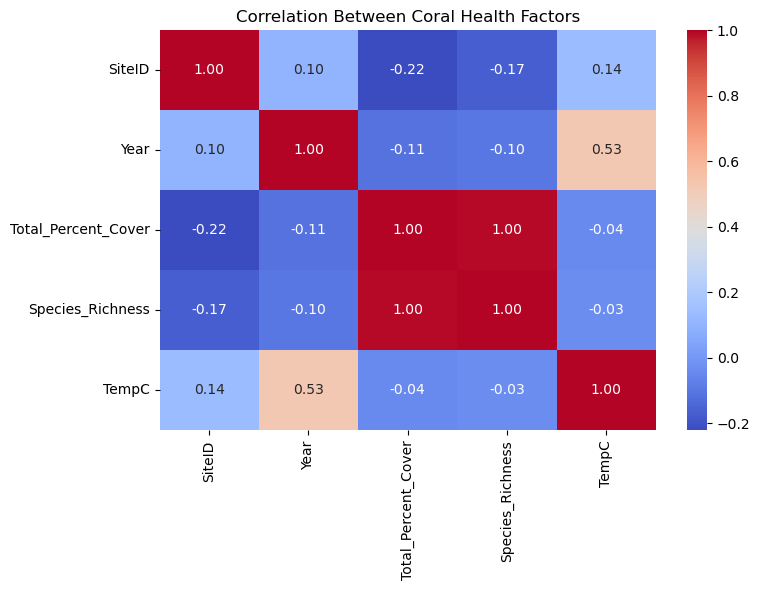

In [60]:
# Use stony coral % cover and join with temperature and richness
df_cover = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"].copy()
df_temp = dataframes["CREMP_Temperatures_2023"]
df_richness = df_cover.copy()

# Calculate total cover
species_cols = [col for col in df_cover.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
df_cover["Total_Percent_Cover"] = df_cover[species_cols].sum(axis=1)
df_richness["Species_Richness"] = (df_richness[species_cols] > 0).sum(axis=1)

# Group and average
df1 = df_cover.groupby(["SiteID", "Year"])["Total_Percent_Cover"].mean().reset_index()
df2 = df_richness.groupby(["SiteID", "Year"])["Species_Richness"].mean().reset_index()
df3 = df_temp.groupby(["SiteID", "Year"])["TempC"].mean().reset_index()

# Merge
merged = df1.merge(df2, on=["SiteID", "Year"]).merge(df3, on=["SiteID", "Year"])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Coral Health Factors")
plt.tight_layout()
plt.show()


In [61]:
# Detect % cover drops per site
df_cover_trend = df1.copy()
df_cover_trend['Prev_Cover'] = df_cover_trend.groupby('SiteID')["Total_Percent_Cover"].shift(1)
df_cover_trend['Change'] = df_cover_trend["Total_Percent_Cover"] - df_cover_trend["Prev_Cover"]

# Flag sites with large drops
early_warning_sites = df_cover_trend[df_cover_trend["Change"] < -10]  # More than 10% drop
print("Early Indicator Sites with Significant Decline:")
display(early_warning_sites[['SiteID', 'Year', 'Change']].sort_values(by="Change"))


Early Indicator Sites with Significant Decline:


Empty DataFrame
Columns: [SiteID, Year, Change]
Index: []

11:03:48 - cmdstanpy - INFO - Chain [1] start processing
11:03:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\dmand\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


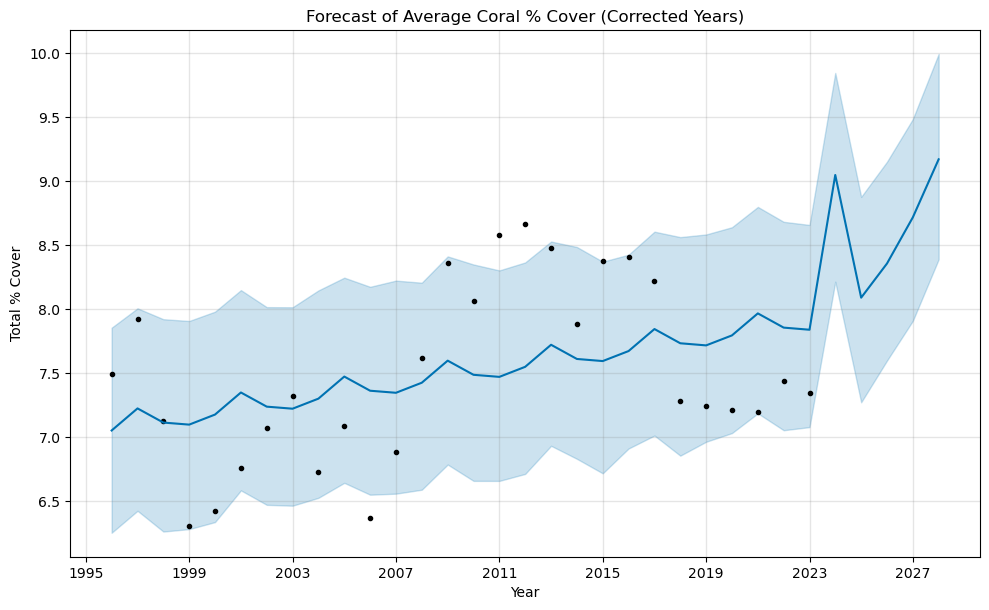

In [62]:
from prophet import Prophet

# Recalculate from your actual Year values
df_forecast = df1.groupby("Year")["Total_Percent_Cover"].mean().reset_index()

# Convert to datetime properly
df_forecast["ds"] = pd.to_datetime(df_forecast["Year"].astype(str) + "-01-01")
df_forecast["y"] = df_forecast["Total_Percent_Cover"]
df_forecast = df_forecast[["ds", "y"]]

# Fit model
model = Prophet()
model.fit(df_forecast)

# Predict next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title("Forecast of Average Coral % Cover (Corrected Years)")
plt.xlabel("Year")
plt.ylabel("Total % Cover")
plt.grid(True)
plt.show()


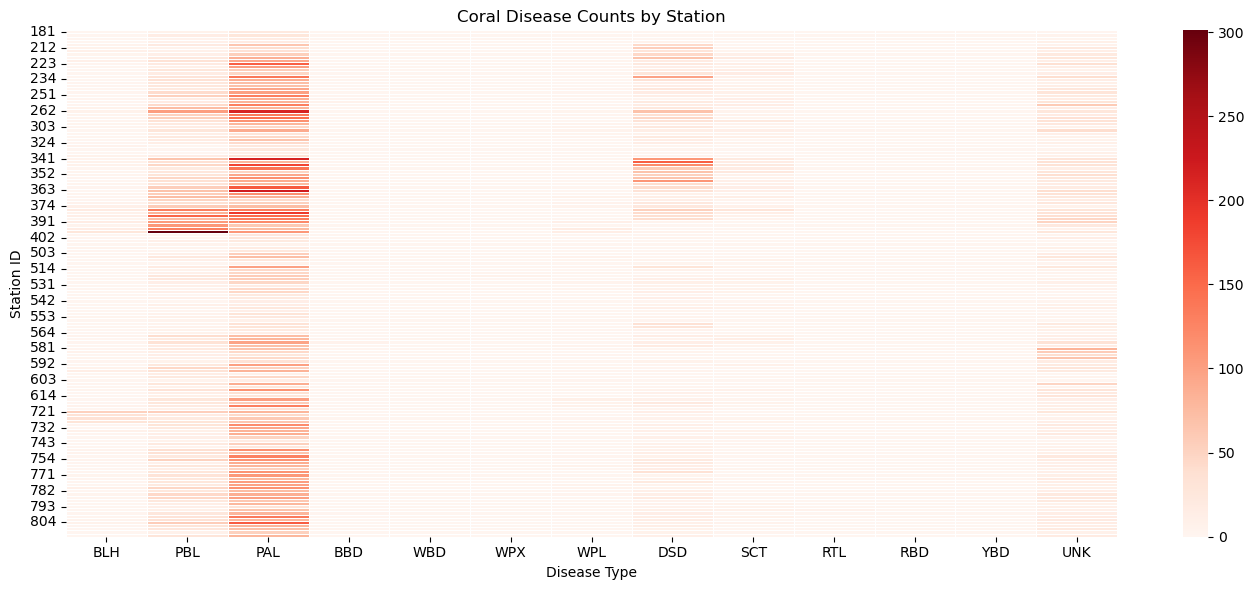

In [63]:
df_conditions = dataframes["CREMP_SCOR_Summaries_2023_ConditionCounts"].copy()

# Select disease columns only (skip Total Count & basic columns)
disease_cols = [col for col in df_conditions.columns if col not in ['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'sciName', 'Count']]

# Sum by StationID
station_diseases = df_conditions.groupby('StationID')[disease_cols].sum()

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(station_diseases, cmap="Reds", annot=False, linewidths=0.5)
plt.title("Coral Disease Counts by Station")
plt.xlabel("Disease Type")
plt.ylabel("Station ID")
plt.tight_layout()
plt.show()


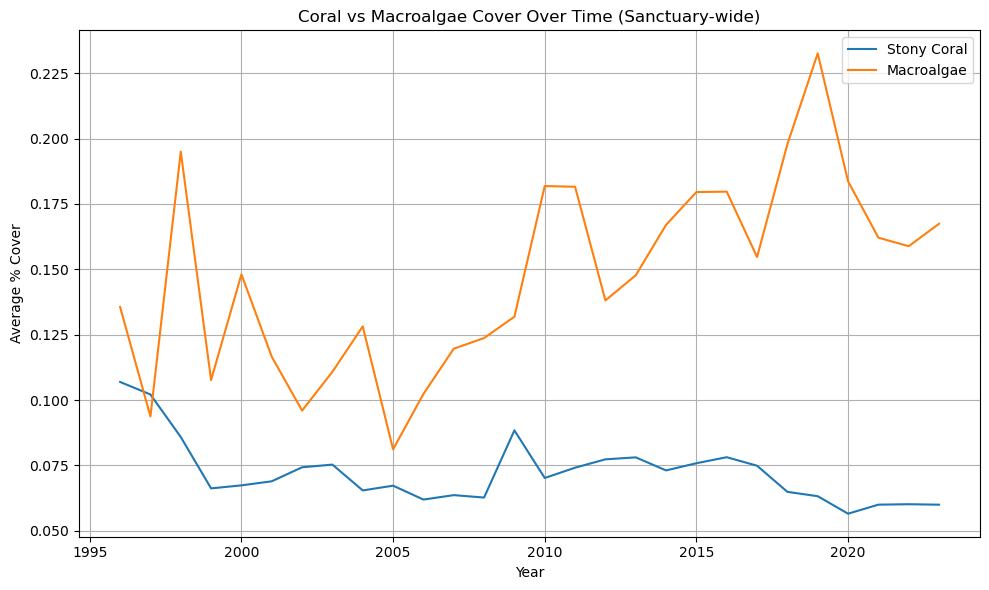

In [64]:
df_taxa = dataframes["CREMP_Pcover_2023_TaxaGroups"].copy()

# Calculate average Stony Coral and Macroalgae % per year
avg_cover = df_taxa.groupby("Year")[["Stony_coral", "Macroalgae"]].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_cover, x="Year", y="Stony_coral", label="Stony Coral")
sns.lineplot(data=avg_cover, x="Year", y="Macroalgae", label="Macroalgae")
plt.title("Coral vs Macroalgae Cover Over Time (Sanctuary-wide)")
plt.ylabel("Average % Cover")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


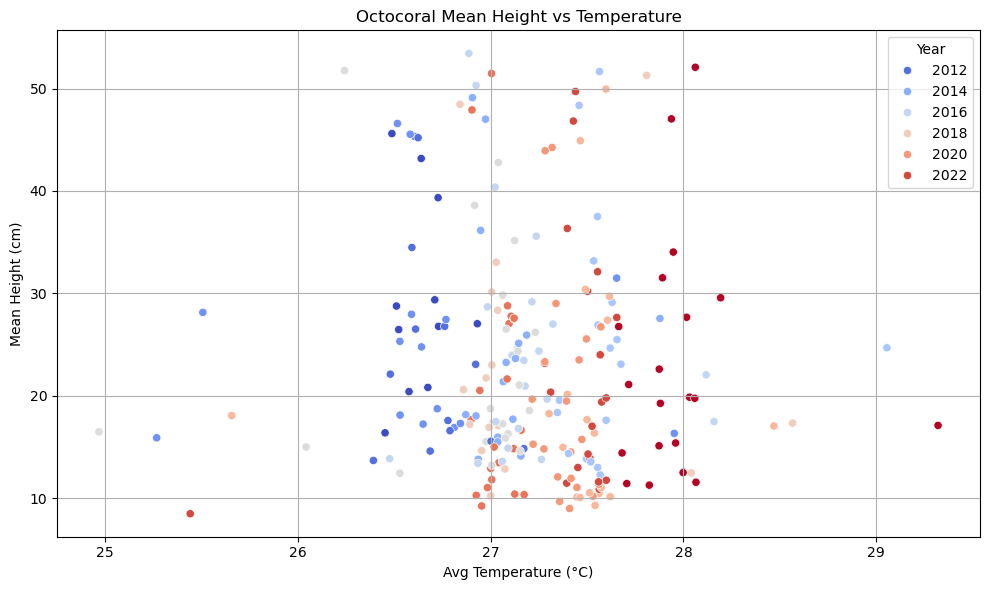

In [65]:
df_height = dataframes["CREMP_OCTO_Summaries_2023_MeanHeight"].copy()
df_temp = dataframes["CREMP_Temperatures_2023"]

# Total avg height across all species per row
height_cols = [col for col in df_height.columns if col not in ['Year', 'FirstOfDate', 'subRegionID', 'HabitatID', 'siteid', 'site_name', 'stationid']]
df_height['Total_Mean_Height'] = df_height[height_cols].mean(axis=1)

# Group by site + year
height_avg = df_height.groupby(['siteid', 'Year'])['Total_Mean_Height'].mean().reset_index()
temp_avg = df_temp.groupby(['SiteID', 'Year'])['TempC'].mean().reset_index()

# Merge
merged = height_avg.merge(temp_avg, left_on=['siteid', 'Year'], right_on=['SiteID', 'Year'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='TempC', y='Total_Mean_Height', hue='Year', palette='coolwarm')
plt.title("Octocoral Mean Height vs Temperature")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("Mean Height (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()


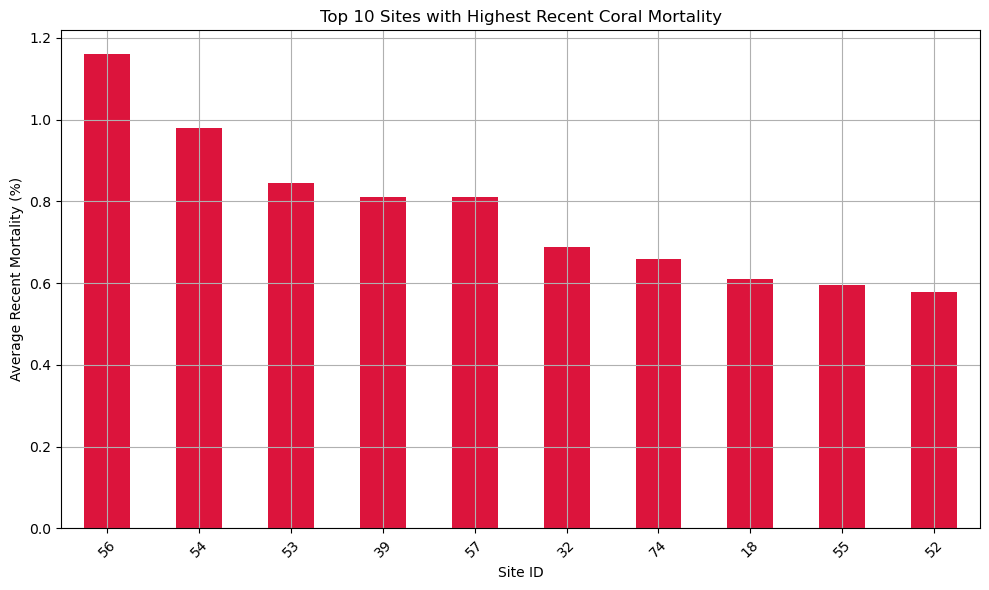

In [66]:
df_raw = dataframes["CREMP_SCOR_RawData_2023"]

# Group by site and get average recent mortality %
mortality_avg = df_raw.groupby("SiteID")["Percent_recent_mortality"].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
mortality_avg.plot(kind='bar', color='crimson')
plt.title("Top 10 Sites with Highest Recent Coral Mortality")
plt.ylabel("Average Recent Mortality (%)")
plt.xlabel("Site ID")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
import folium

df_stations = dataframes["CREMP_Stations_2023"]
df_cover = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"]

# Calculate total coral cover per station
species_cols = [col for col in df_cover.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
df_cover["Total_Percent_Cover"] = df_cover[species_cols].sum(axis=1)
cover_latest = df_cover[df_cover["Year"] == df_cover["Year"].max()]
avg_cover = cover_latest.groupby("StationID")["Total_Percent_Cover"].mean().reset_index()

# Merge with lat/lon
merged_map = df_stations.merge(avg_cover, on="StationID")

# Create map
m = folium.Map(location=[24.6, -81.5], zoom_start=7)
for _, row in merged_map.iterrows():
    folium.CircleMarker(
        location=[row["latDD"], row["lonDD"]],
        radius=row["Total_Percent_Cover"] / 5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['Site_name']}: {row['Total_Percent_Cover']:.2f}%"
    ).add_to(m)

m


C:\Users\dmand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


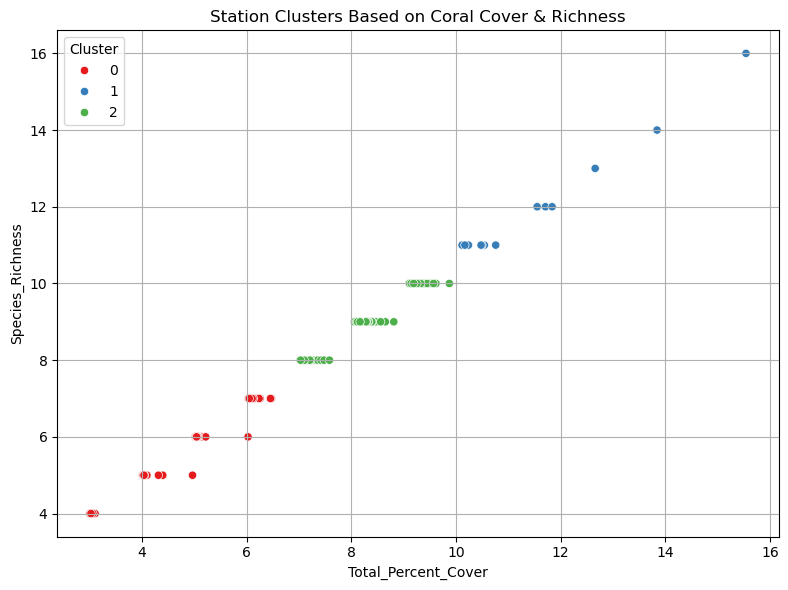

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_richness = df_cover.copy()
df_richness["Species_Richness"] = (df_cover[species_cols] > 0).sum(axis=1)
df_latest = df_richness[df_richness["Year"] == df_richness["Year"].max()]
df_cluster = df_latest.groupby("StationID")[["Total_Percent_Cover", "Species_Richness"]].mean().dropna()

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(X)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster, x='Total_Percent_Cover', y='Species_Richness', hue='Cluster', palette='Set1')
plt.title("Station Clusters Based on Coral Cover & Richness")
plt.grid(True)
plt.tight_layout()
plt.show()


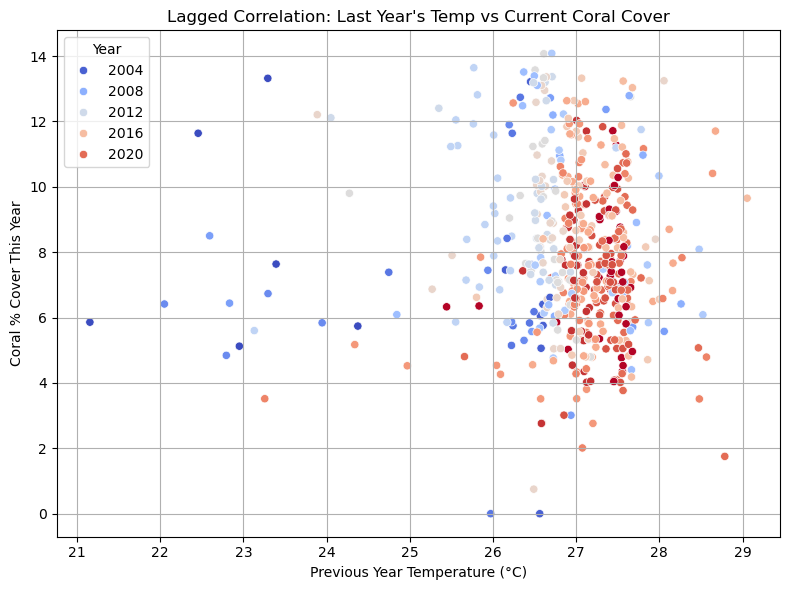

In [69]:
df_temp = dataframes["CREMP_Temperatures_2023"]
df_temp_avg = df_temp.groupby(['SiteID', 'Year'])['TempC'].mean().reset_index()
df_cover_avg = df_cover.groupby(['SiteID', 'Year'])['Total_Percent_Cover'].mean().reset_index()

# Shift temperature year back to simulate lag effect
df_temp_avg['Year'] += 1

# Merge
df_lag = pd.merge(df_cover_avg, df_temp_avg, on=['SiteID', 'Year'])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_lag, x='TempC', y='Total_Percent_Cover', hue='Year', palette='coolwarm')
plt.title("Lagged Correlation: Last Year's Temp vs Current Coral Cover")
plt.xlabel("Previous Year Temperature (°C)")
plt.ylabel("Coral % Cover This Year")
plt.grid(True)
plt.tight_layout()
plt.show()


11:03:58 - cmdstanpy - INFO - Chain [1] start processing
11:03:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\dmand\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


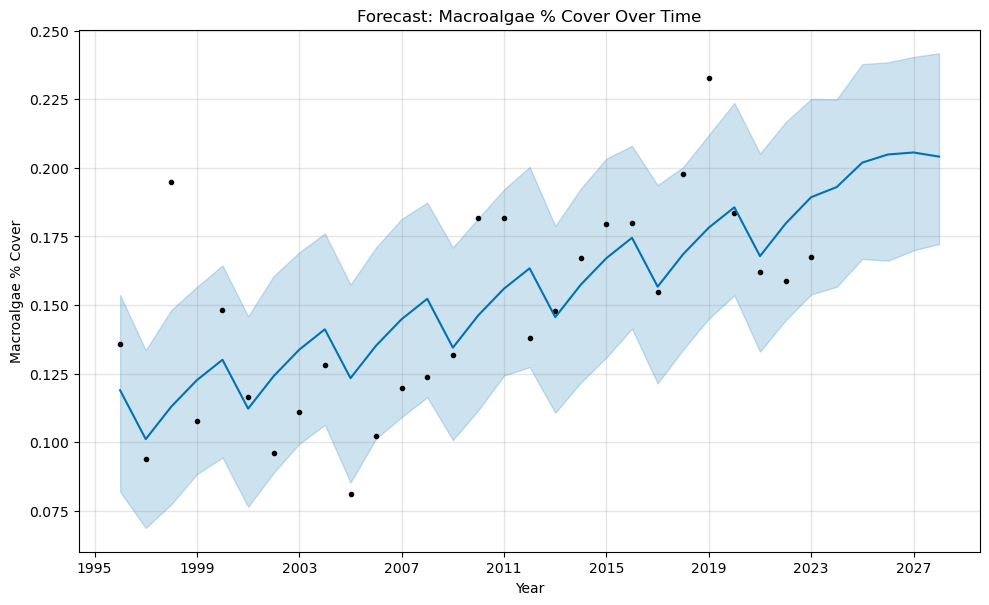

In [70]:
from prophet import Prophet

df_taxa = dataframes["CREMP_Pcover_2023_TaxaGroups"].copy()
macro_trend = df_taxa.groupby("Year")["Macroalgae"].mean().reset_index()
macro_trend["ds"] = pd.to_datetime(macro_trend["Year"].astype(str) + "-01-01")
macro_trend = macro_trend.rename(columns={"Macroalgae": "y"})

# Fit model
model_macro = Prophet()
model_macro.fit(macro_trend)

# Predict
future_macro = model_macro.make_future_dataframe(periods=5, freq='Y')
forecast_macro = model_macro.predict(future_macro)

# Plot
fig = model_macro.plot(forecast_macro)
plt.title("Forecast: Macroalgae % Cover Over Time")
plt.xlabel("Year")
plt.ylabel("Macroalgae % Cover")
plt.grid(True)
plt.show()


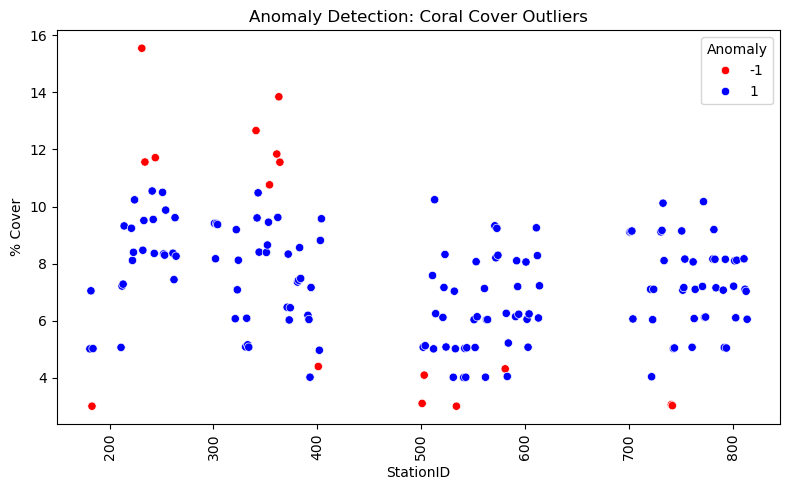

In [71]:
from sklearn.ensemble import IsolationForest

# Build feature set
df_features = df_cover[df_cover["Year"] == df_cover["Year"].max()]
features = df_features.groupby("StationID")[["Total_Percent_Cover"]].mean()

# Apply Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
features['Anomaly'] = model.fit_predict(features)

# Visualize
plt.figure(figsize=(8, 5))
sns.scatterplot(data=features, x=features.index, y="Total_Percent_Cover", hue="Anomaly", palette={1: "blue", -1: "red"})
plt.title("Anomaly Detection: Coral Cover Outliers")
plt.ylabel("% Cover")
plt.xlabel("StationID")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [72]:
from sklearn.preprocessing import MinMaxScaler

# --- Coral Cover & Richness ---
df_coral = df_cover[df_cover["Year"] == df_cover["Year"].max()].copy()
species_cols = [col for col in df_cover.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
df_coral["Species_Richness"] = (df_coral[species_cols] > 0).sum(axis=1)

coral_metrics = df_coral.groupby("SiteID")[["Total_Percent_Cover", "Species_Richness"]].mean()

# --- Octocoral Height ---
df_height = dataframes["CREMP_OCTO_Summaries_2023_MeanHeight"].copy()
height_cols = [col for col in df_height.columns if col not in ['Year', 'FirstOfDate', 'subRegionID', 'HabitatID', 'siteid', 'site_name', 'stationid']]
df_height["Total_Height"] = df_height[height_cols].mean(axis=1)
octo_height = df_height.groupby("siteid")["Total_Height"].mean()
coral_metrics["Octocoral_Height"] = octo_height

# --- LTA ---
df_lta = dataframes["CREMP_SCOR_Summaries_2023_LTA"]
lta_total = df_lta.select_dtypes(include='number').groupby("SiteID").sum().sum(axis=1)
coral_metrics["LTA"] = lta_total

# --- Temperature ---
df_temp = dataframes["CREMP_Temperatures_2023"]
temp_avg = df_temp.groupby("SiteID")["TempC"].mean()
coral_metrics["TempC"] = temp_avg

# Drop NA and scale
coral_metrics = coral_metrics.dropna()
q = coral_metrics.quantile([0.25, 0.75])
early_warning = pd.DataFrame(index=coral_metrics.index)

# Flag: 1 = Warning
early_warning["Low_Coral"] = coral_metrics["Total_Percent_Cover"] < q.loc[0.25, "Total_Percent_Cover"]
early_warning["Low_Richness"] = coral_metrics["Species_Richness"] < q.loc[0.25, "Species_Richness"]
early_warning["Low_OctoHeight"] = coral_metrics["Octocoral_Height"] < q.loc[0.25, "Octocoral_Height"]
early_warning["Low_LTA"] = coral_metrics["LTA"] < q.loc[0.25, "LTA"]
early_warning["High_Temp"] = coral_metrics["TempC"] > q.loc[0.75, "TempC"]

# Count how many red flags
early_warning["Risk_Score"] = early_warning.sum(axis=1)

# Show top risky sites
high_risk = early_warning.sort_values("Risk_Score", ascending=False).head(10)
print("🚨 TOP EARLY WARNING STATIONS:")
print(high_risk)


🚨 TOP EARLY WARNING STATIONS:
        Low_Coral  Low_Richness  Low_OctoHeight  Low_LTA  High_Temp  \
SiteID                                                                
54           True          True            True     True       True   
74           True          True            True     True      False   
50           True          True           False    False       True   
56           True          True           False     True      False   
55          False         False            True     True      False   
81          False         False            True    False       True   
33           True          True           False    False      False   
61          False         False           False    False       True   
72          False         False           False     True      False   
75          False         False           False    False       True   

        Risk_Score  
SiteID              
54               5  
74               4  
50               3  
56          

C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\2056680418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk.reset_index(), x='SiteID', y='Risk_Score', palette='Reds')


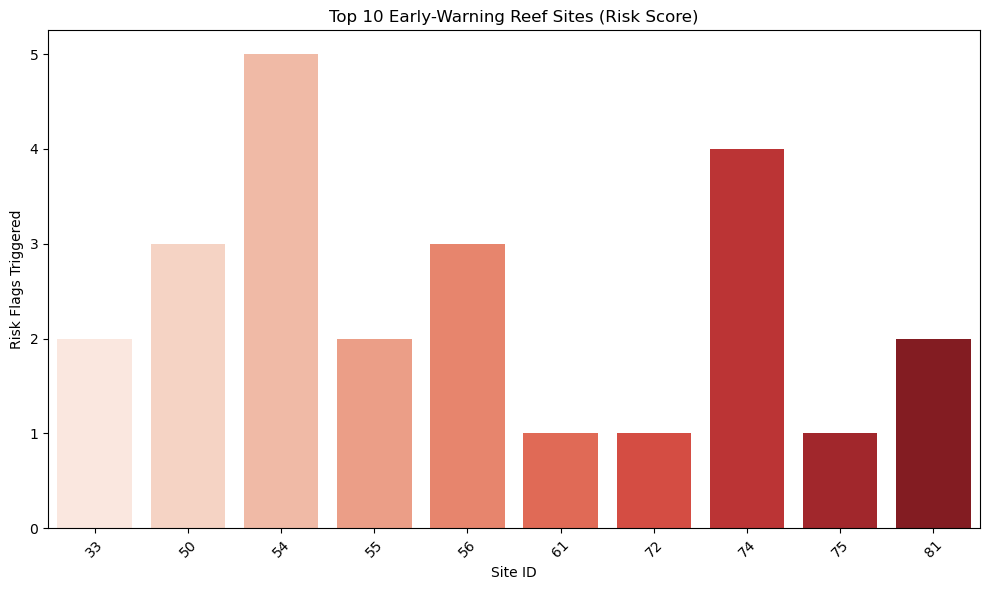

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=high_risk.reset_index(), x='SiteID', y='Risk_Score', palette='Reds')
plt.title("Top 10 Early-Warning Reef Sites (Risk Score)")
plt.ylabel("Risk Flags Triggered")
plt.xlabel("Site ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🏆 Top 10 Healthiest Reefs:
        ReefHealthIndex
SiteID                 
36             0.931630
38             0.673600
34             0.642263
35             0.573701
26             0.562049
32             0.416612
59             0.351684
75             0.332174
70             0.330638
52             0.286692


C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\3449066081.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


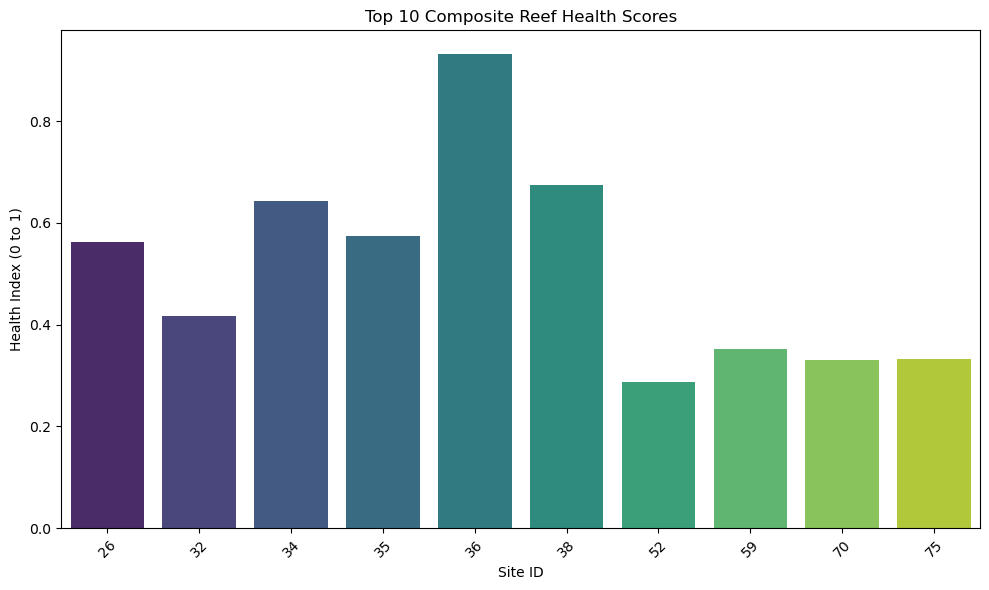

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Reuse the cleaned & merged coral_metrics from previous step
metrics = coral_metrics.copy().dropna()

# Normalize all metrics
scaler = MinMaxScaler()
metrics_scaled = pd.DataFrame(scaler.fit_transform(metrics), columns=metrics.columns, index=metrics.index)

# Higher temp is bad, invert it
metrics_scaled["TempC"] = 1 - metrics_scaled["TempC"]

# Calculate Composite Score (equal weight)
metrics_scaled["ReefHealthIndex"] = metrics_scaled.mean(axis=1)

# Sort top to bottom
reef_index_sorted = metrics_scaled.sort_values("ReefHealthIndex", ascending=False)
print("🏆 Top 10 Healthiest Reefs:")
print(reef_index_sorted[["ReefHealthIndex"]].head(10))
plt.figure(figsize=(10, 6))
sns.barplot(
    data=reef_index_sorted.reset_index().head(10),
    x='SiteID', y='ReefHealthIndex', palette='viridis'
)
plt.title("Top 10 Composite Reef Health Scores")
plt.ylabel("Health Index (0 to 1)")
plt.xlabel("Site ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


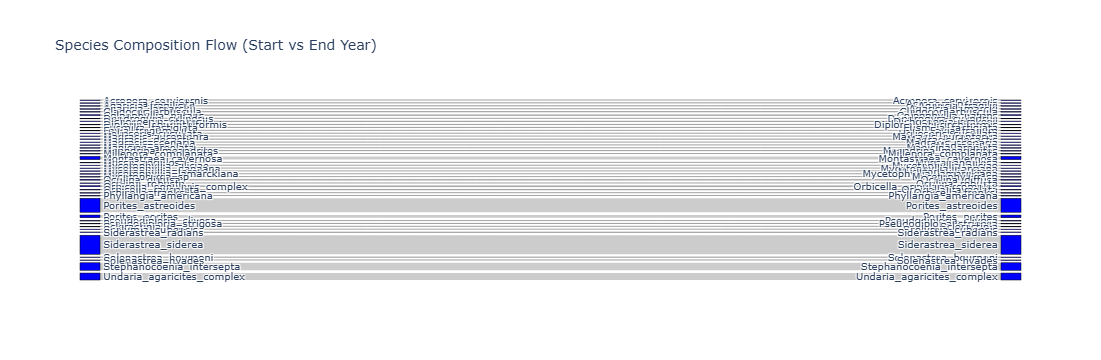

In [75]:
import plotly.graph_objects as go

df_counts = dataframes["CREMP_SCOR_Summaries_2023_Counts"]
years = df_counts["Year"].unique()
start_year, end_year = years.min(), years.max()

df_start = df_counts[df_counts["Year"] == start_year]
df_end = df_counts[df_counts["Year"] == end_year]

# Sum by species
start_sums = df_start.iloc[:, 7:].sum()
end_sums = df_end.iloc[:, 7:].sum()

species = list(start_sums.index)
sources = []
targets = []
values = []

for i, sp in enumerate(species):
    sources.append(i)
    targets.append(i + len(species))
    values.append((start_sums[sp] + end_sums[sp]) / 2)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=species + species,
        color="blue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Species Composition Flow (Start vs End Year)", font_size=10)
fig.show()


📉 Correlation between Coral Cover and Previous Year Temp: 0.19


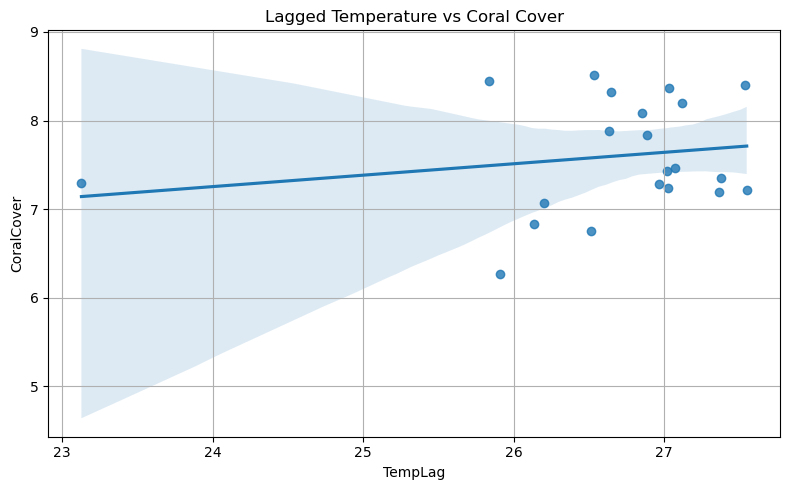

In [76]:
df_temp = dataframes["CREMP_Temperatures_2023"]
df_coral = df_cover.copy()

# Yearly average temp
temp_year = df_temp.groupby("Year")["TempC"].mean()
coral_year = df_coral.groupby("Year")["Total_Percent_Cover"].mean()

# Align and lag temp by 1 year
temp_lag = temp_year.shift(1)
df_corr = pd.DataFrame({
    "TempLag": temp_lag,
    "CoralCover": coral_year
}).dropna()

corr_val = df_corr.corr().iloc[0,1]
print(f"📉 Correlation between Coral Cover and Previous Year Temp: {corr_val:.2f}")

# Visualize
plt.figure(figsize=(8,5))
sns.regplot(data=df_corr, x="TempLag", y="CoralCover")
plt.title("Lagged Temperature vs Coral Cover")
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
from scipy.stats import linregress

# Load stony coral percent cover data
df = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"].copy()

# Filter species columns only
species_cols = [col for col in df.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]

# Get average percent cover per species per year
df_avg = df.groupby("Year")[species_cols].mean().reset_index()

# Calculate slope (trend) per species using linregress
slopes = {}
for col in species_cols:
    slope, _, _, _, _ = linregress(df_avg["Year"], df_avg[col])
    slopes[col] = slope

# Sort by most negative slope (declining species)
decline_df = pd.DataFrame(slopes.items(), columns=["Species", "Slope"])
decline_df = decline_df.sort_values("Slope")

# Show top 10 declining species
print("📉 Top 10 Declining Coral Species by Cover Trend:")
print(decline_df.head(10))


📉 Top 10 Declining Coral Species by Cover Trend:
                        Species     Slope
27  Orbicella_annularis_complex -0.000962
40              StonyCoralCover -0.000781
1              Acropora_palmata -0.000199
19         Millepora_complanata -0.000130
33                 Scleractinia -0.000095
6          Dendrogyra_cylindrus -0.000051
20        Montastraea_cavernosa -0.000048
32      Pseudodiploria_strigosa -0.000034
0          Acropora_cervicornis -0.000030
8     Diploria_labyrinthiformis -0.000021


C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\83353779.py:16: UserWarning:

Glyph 129440 (\N{MICROBE}) missing from current font.

C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\83353779.py:17: UserWarning:

Glyph 129440 (\N{MICROBE}) missing from current font.

C:\Users\dmand\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129440 (\N{MICROBE}) missing from current font.



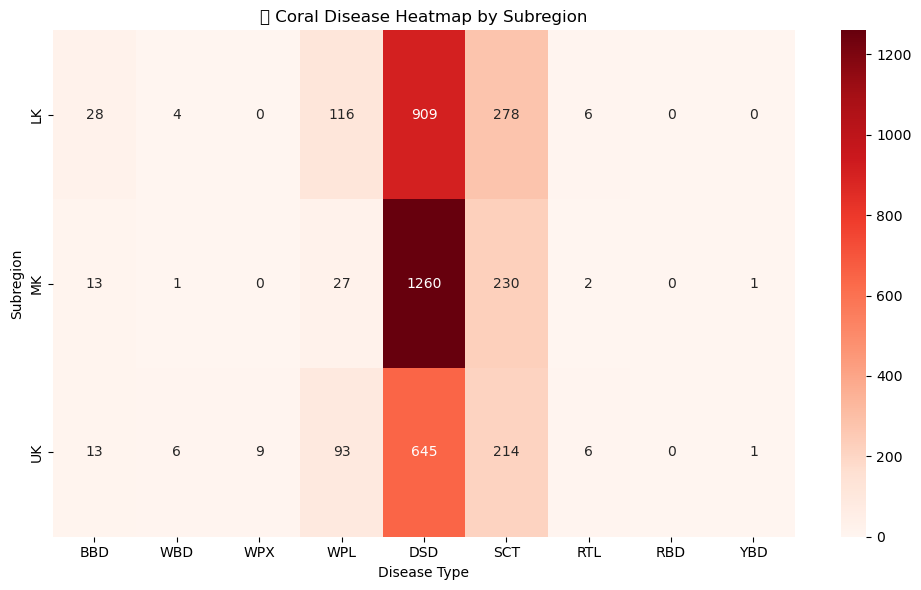

In [78]:
# Load condition counts
df_disease = dataframes["CREMP_SCOR_Summaries_2023_ConditionCounts"].copy()

# List of major diseases
disease_cols = ['BBD', 'WBD', 'WPX', 'WPL', 'DSD', 'SCT', 'RTL', 'RBD', 'YBD']

# Group by Subregion and sum disease counts
disease_summary = df_disease.groupby("Subregion")[disease_cols].sum()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(disease_summary, annot=True, fmt="d", cmap="Reds")
plt.title("🦠 Coral Disease Heatmap by Subregion")
plt.ylabel("Subregion")
plt.xlabel("Disease Type")
plt.tight_layout()
plt.savefig("disease_heatmap.png")
plt.show()


In [118]:
df_cover = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"].copy()

# Calculate total coral cover if not already present
species_cols = [col for col in df_cover.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
if "Total_Percent_Cover" not in df_cover.columns:
    df_cover["Total_Percent_Cover"] = df_cover[species_cols].sum(axis=1)


In [80]:
# Rebuild coral_metrics using previously cleaned features
df_cover = dataframes["CREMP_Pcover_2023_StonyCoralSpecies"].copy()
df_cover["Total_Percent_Cover"] = df_cover[
    [col for col in df_cover.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
].sum(axis=1)
df_cover["Species_Richness"] = (
    df_cover[
        [col for col in df_cover.columns if col not in ['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points']]
    ] > 0
).sum(axis=1)
coral = df_cover.groupby("SiteID")[["Total_Percent_Cover", "Species_Richness"]].mean()

# Octocoral mean height
df_height = dataframes["CREMP_OCTO_Summaries_2023_MeanHeight"]
octo = df_height.select_dtypes(include='number').groupby("siteid").mean().mean(axis=1)
coral["Octocoral_Height"] = octo

# LTA
df_lta = dataframes["CREMP_SCOR_Summaries_2023_LTA"]
lta = df_lta.select_dtypes(include='number').groupby("SiteID").sum().sum(axis=1)
coral["LTA"] = lta

# Temp
df_temp = dataframes["CREMP_Temperatures_2023"]
temp = df_temp.groupby("SiteID")["TempC"].mean()
coral["TempC"] = temp

coral_metrics = coral.dropna()


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

year_min = df_cover["Year"].min()
year_max = df_cover["Year"].max()

cover_start = df_cover[df_cover["Year"] == year_min].groupby("SiteID")["Total_Percent_Cover"].mean()
cover_end = df_cover[df_cover["Year"] == year_max].groupby("SiteID")["Total_Percent_Cover"].mean()
delta = (cover_end - cover_start).dropna()
labels = (delta > 0).astype(int)

# Ensure only overlapping SiteIDs are used
valid_sites = coral_metrics.index.intersection(labels.index)
features = coral_metrics.loc[valid_sites]
labels = labels.loc[valid_sites]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("📈 Reef Recovery Predictor Performance:")
print(classification_report(y_test, model.predict(X_test)))



📈 Reef Recovery Predictor Performance:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\dmand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\dmand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\dmand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [82]:
import folium

# Join station data with average temp and coral cover
temp_avg = df_temp.groupby("SiteID")["TempC"].mean()
coral_latest = df_cover[df_cover["Year"] == df_cover["Year"].max()].groupby("SiteID")["Total_Percent_Cover"].mean()

df_map = df_stations.copy()
df_map = df_map.set_index("SiteID").join(temp_avg).join(coral_latest)
df_map = df_map.dropna()

# Risk filter: High temp and low coral
df_map["HighRisk"] = (df_map["TempC"] > 28.5) & (df_map["Total_Percent_Cover"] < 10)

# Create folium map
heat_map = folium.Map(location=[24.6, -81.5], zoom_start=7)
for _, row in df_map.iterrows():
    color = 'red' if row["HighRisk"] else 'green'
    folium.CircleMarker(
        location=[row["latDD"], row["lonDD"]],
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['Site_name']}<br>Temp: {row['TempC']:.1f}°C<br>Coral: {row['Total_Percent_Cover']:.1f}%"
    ).add_to(heat_map)

heat_map.save("heat_stress_map.html")
heat_map.save("heat_stress_map.html")
heat_map  # ← this line shows it live inside Jupyter


C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\3711685437.py:26: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\dmand\AppData\Local\Temp\ipykernel_25584\3711685437.py:27: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

C:\Users\dmand\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



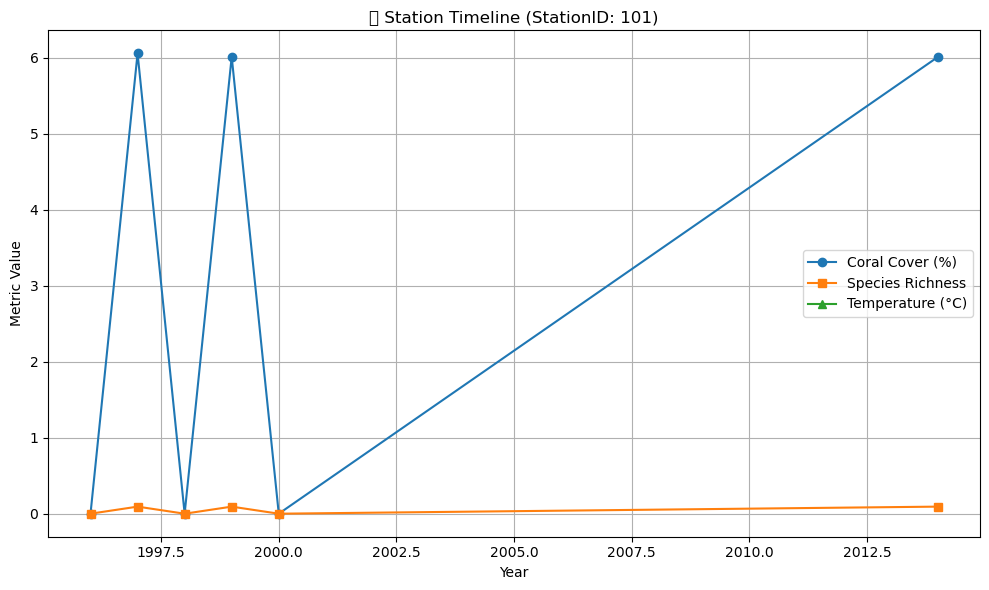

In [83]:
import matplotlib.pyplot as plt

# Choose one station (e.g., StationID = 101)
station_id = df_cover["StationID"].unique()[0]
site_id = df_cover[df_cover["StationID"] == station_id]["SiteID"].values[0]

# Group yearly cover + richness
df_station = df_cover[df_cover["StationID"] == station_id]
df_yearly = df_station.groupby("Year")[["Total_Percent_Cover"]].mean()
df_yearly["Species_Richness"] = (df_station[species_cols] > 0).groupby(df_station["Year"]).sum().mean(axis=1)

# Yearly temperature
df_temp_station = df_temp[df_temp["SiteID"] == site_id].groupby("Year")["TempC"].mean()
df_yearly["TempC"] = df_temp_station

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly["Total_Percent_Cover"], label="Coral Cover (%)", marker='o')
plt.plot(df_yearly.index, df_yearly["Species_Richness"], label="Species Richness", marker='s')
plt.plot(df_yearly.index, df_yearly["TempC"], label="Temperature (°C)", marker='^')
plt.title(f"📊 Station Timeline (StationID: {station_id})")
plt.xlabel("Year")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("station_timeline.png")
plt.show()


In [122]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy.spatial import distance


# 1. Join Data:  Combine temperature and coral cover with station locations
temp_avg = df_temp.groupby("SiteID")["TempC"].mean()
coral_latest = df_cover[df_cover["Year"] == df_cover["Year"].max()].groupby("SiteID")["Total_Percent_Cover"].mean()

df_spatial = df_stations.copy()
df_spatial = df_spatial.set_index("SiteID").join(temp_avg).join(coral_latest)
df_spatial = df_spatial.dropna()  # Drop any stations with missing data

# 2. Create a GeoDataFrame: Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_spatial.lonDD, df_spatial.latDD)]
gdf = geopandas.GeoDataFrame(df_spatial, crs="EPSG:4326", geometry=geometry)  #  EPSG:4326 is WGS 84

print(gdf.head())


        OID_ Region Site_Code     Site_name Habitat Subregion  StationID  \
SiteID                                                                     
18        53  FKNMS       3H1  Content Keys     BCP        LK        181   
18        54  FKNMS       3H1  Content Keys     BCP        LK        182   
18        55  FKNMS       3H1  Content Keys     BCP        LK        183   
18        56  FKNMS       3H1  Content Keys     BCP        LK        184   
21        57  FKNMS       9P5   Two Patches       P        UK        211   

        First_Year_surveyed  length_m  Depth_ft    latDD    lonDD  latDeg  \
SiteID                                                                      
18                     1996        23        18  24.8221 -81.4889    24.0   
18                     1996        23        18  24.8221 -81.4889    24.0   
18                     1996        24        18  24.8221 -81.4889    24.0   
18                     1996        22        18  24.8221 -81.4889    24.0   
21   

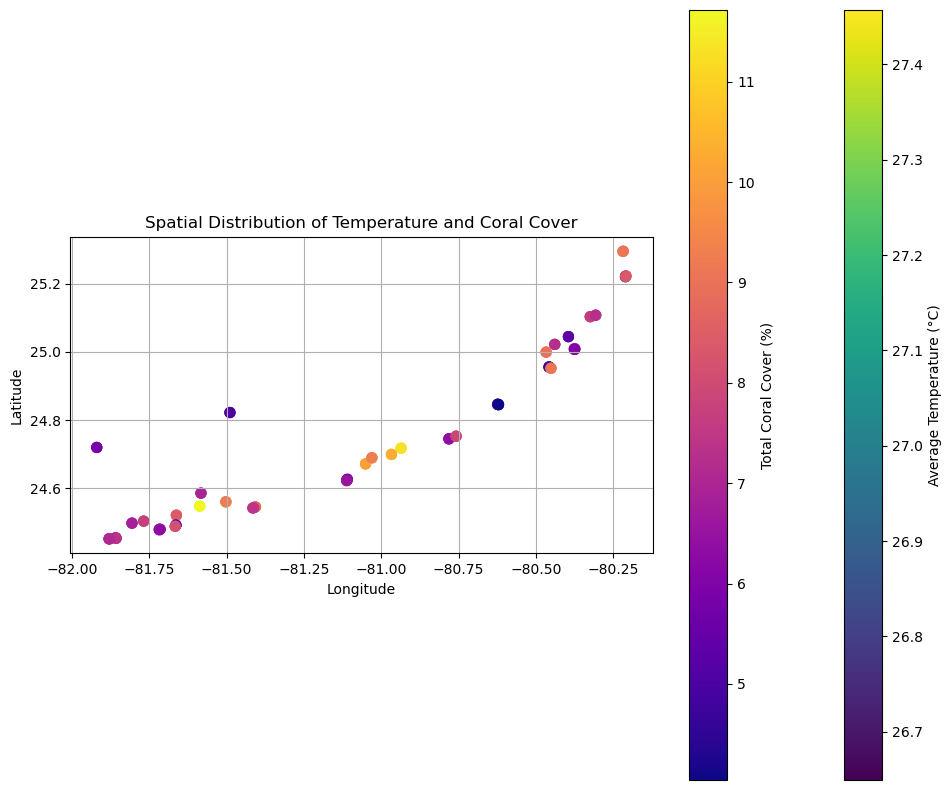

In [124]:
# Visualize: Plotting the spatial distribution of temperature and coral cover
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='TempC', cmap='viridis', legend=True, ax=ax, alpha=0.8,
         legend_kwds={'label': "Average Temperature (°C)"})
gdf.plot(column='Total_Percent_Cover', cmap='plasma', legend=True, ax=ax,
         alpha=0.8, markersize=50,
         legend_kwds={'label': "Total Coral Cover (%)"})
ax.set_title('Spatial Distribution of Temperature and Coral Cover')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

